In [1]:
import spacy
from nltk.corpus import stopwords

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

# Exercise II – Word2vec

#### 1-Import spacy library and load the en_core_web_md model

In [2]:
# Load the 'en_core_web_md' model
word2vec = spacy.load('en_core_web_md')

#### 2-Show the word vector for “football”, how long is it?

In [3]:
# Word football
football = word2vec('football')
print(football.vector) # Vector of shape (300,)
print("Vector dimensions: {}".format(len(football.vector)))

[-1.8633e+00  4.2826e+00 -7.1575e-01  1.2353e+00  5.4601e+00  6.0244e+00
 -2.2204e+00  1.7759e+00  2.5588e+00 -2.0682e+00  4.4509e+00 -2.2267e+00
 -1.6666e+00 -1.0174e+00 -5.0303e+00  2.4880e+00  4.0848e-01  1.0369e+00
  3.4916e+00  3.7098e+00  2.2451e+00 -1.1685e+00 -3.2297e-01 -1.6925e+00
  8.3621e-01 -2.6654e-02 -3.7525e+00 -4.9996e-01  5.6734e+00  4.7680e+00
 -3.7574e+00 -1.4604e-01  5.3413e-01 -5.5588e+00  1.1134e+00  3.0370e+00
  6.7387e-01  4.8416e+00 -6.9886e+00 -2.4840e+00  9.1392e-01  3.8642e+00
  4.7409e+00 -9.1215e-01 -4.7876e-01 -4.5356e-01 -2.5983e+00 -2.6529e+00
 -6.0445e+00  6.5456e-01  4.5724e+00  4.7130e+00 -8.7298e-01 -2.4036e+00
  1.3543e+00 -2.4419e-02 -1.6746e+00  5.0430e+00 -7.3322e-01  3.2873e+00
 -8.2850e-01 -1.7169e+00 -1.2998e+00 -5.5582e-01  2.4973e+00  8.2000e-01
 -5.0912e+00  2.9508e+00 -2.6805e+00  1.6948e+00  2.6353e-01 -5.5573e-01
 -2.5534e+00 -7.1705e-01  2.5999e+00 -3.8282e-01 -3.7611e+00  7.0098e+00
 -2.3766e+00 -6.6381e-01 -2.1161e+00 -1.0708e+00 -4

#### 3-Show the word vector for “frankfurteria”, how long is it?

In [4]:
# Word frankfruteria
frankfurteria = word2vec('frankfurteria')
print(frankfurteria.vector) # As you can see the word is not in the vocabulary and the vector is 0
print("Vector dimensions: {}".format(len(frankfurteria.vector)))


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Vector dimensions: 300


#### 4-Check whether the word “flowers” is in the model vocabulary

In [5]:
if (word2vec('flowers').has_vector):
    print("The word 'flowers' is in the vocabulary")
else:
    print("The word 'flowers' is not in the vocabulary")

The word 'flowers' is in the vocabulary


#### 5-Create a sentence including the word ”football”, and show the sentence vector

In [6]:
# Creating a sentence with the word football
sentence = "I love football"
sentence = word2vec(sentence)
print("Sentence vector: {}".format(sentence.vector))

Sentence vector: [-5.55833340e-01  4.04913336e-01 -3.53155017e+00 -4.51553297e+00
 -3.77913976e+00  1.58433342e+00  1.28319991e+00  3.38106656e+00
 -3.89406657e+00  4.48296642e+00  5.13333368e+00  1.95733309e-01
 -3.15857315e+00 -1.55793333e+00  2.26729989e+00 -2.49020004e+00
  1.30357993e+00 -5.25729990e+00 -6.90733254e-01  2.75573325e+00
  3.37370324e+00  2.10026670e+00  2.22043231e-01 -7.20009995e+00
  3.02003294e-01 -1.65274799e+00 -1.69303334e+00  2.47341323e+00
  5.95900059e-01  2.66406655e+00 -1.72683334e+00 -4.20704651e+00
 -5.58856666e-01  3.11766624e-01  3.19316673e+00 -8.46833363e-02
 -1.83684337e+00  1.30797994e+00  9.42366600e-01 -7.59243965e-01
 -1.61022675e+00  5.06069994e+00  2.45688653e+00 -3.23515010e+00
  2.96348000e+00  3.08211327e+00 -4.37366676e+00 -4.18766642e+00
 -8.07310045e-01  2.68785310e+00  2.23870015e+00 -1.31556690e+00
 -1.34566650e-01 -3.27453327e+00 -1.72575033e+00 -1.27696967e+00
  8.27843189e-01  3.01980019e+00  2.86379337e+00  4.27963305e+00
  5.3642

#### 6-How long is the sentence vector? How is it calculated?

The sentence vector is the average of the word vectors

In [7]:
print("Vector dimensions: {}".format(len(sentence.vector)))

Vector dimensions: 300


# Exercise III – Similarity

#### 1 and 2-Define the two utterances “I visited Scotland” and “I went to Edinburgh” and compute the similaritry:

In [8]:
sentence1 = "I visited Scotland"
sentence2 = "I went to Edinburgh"
sentence1 = word2vec(sentence1)
sentence2 = word2vec(sentence2)

# Compute the similarity between the two sentences
similarity = sentence1.similarity(sentence2)
print(similarity)

0.753202935804182


#### Define two similar sentences and calculate their similarity:

In [10]:
# Two similar sentences different from the previous ones
sentence1 = "I went on a vacation to the beach"
sentence2 = "I will go to the beach on the holidays"
sentence1 = word2vec(sentence1)
sentence2 = word2vec(sentence2)

# Compute the similarity between the two sentences
similarity = sentence1.similarity(sentence2)
print(similarity)

0.9164728015542848


#### Define two very different sentences and calculate their similarity

In [11]:
# Two non similar sentences
sentence1 = "I will go to the beach on the holidays"
sentence2 = "The weather was nice yesterday"
sentence1 = word2vec(sentence1)
sentence2 = word2vec(sentence2)

# Compute the similarity between the two sentences
similarity = sentence1.similarity(sentence2)
print(similarity)

0.4596957788886094


#### 3, 4 and 5-Consider the following words [cat, dog, tiger, elephant, bird, monkey, lion, cheetah, burger, pizza, food, cheese, wine, salad, noodles, fruit, vegetables], calculate the word vector for every word and Apply a PCA, consider the first two components, and represent the words in the feature space

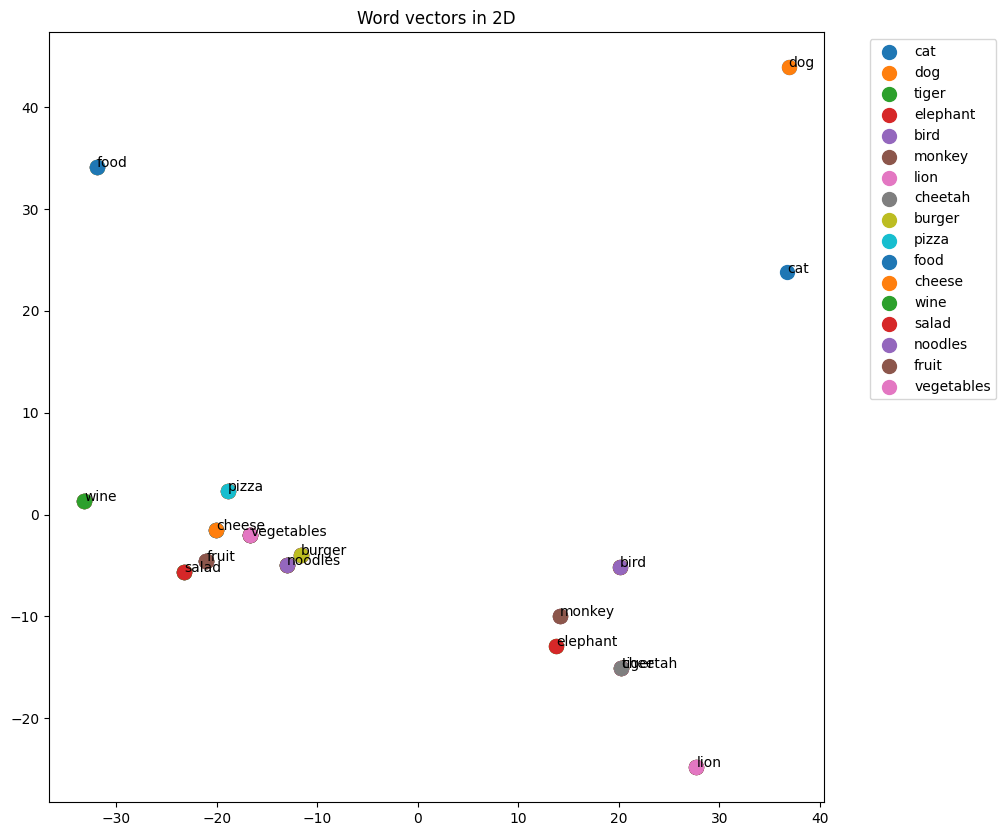

In [19]:
words = ['cat', 'dog', 'tiger', 'elephant', 'bird', 'monkey', 'lion', 'cheetah', 'burger', 'pizza', 'food', 'cheese', 'wine', 'salad', 'noodles', 'fruit', 'vegetables']

# Computing the vector of each word
word_vectors = [word2vec(word).vector for word in words]

# Applying PCA to reduce the dimensionality of the word vectors to 2
pca = PCA(n_components=2)
word_vec_2d = pca.fit_transform(word_vectors)

# Plotting the 2D word vectors
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(word_vec_2d[i:, 0], word_vec_2d[i:, 1], s=100)
    plt.text(word_vec_2d[i, 0], word_vec_2d[i, 1], word)
    plt.legend(words, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('Word vectors in 2D')
plt.show()

#### Define a new set of words (at least 20 different words), and represent them in the feature space

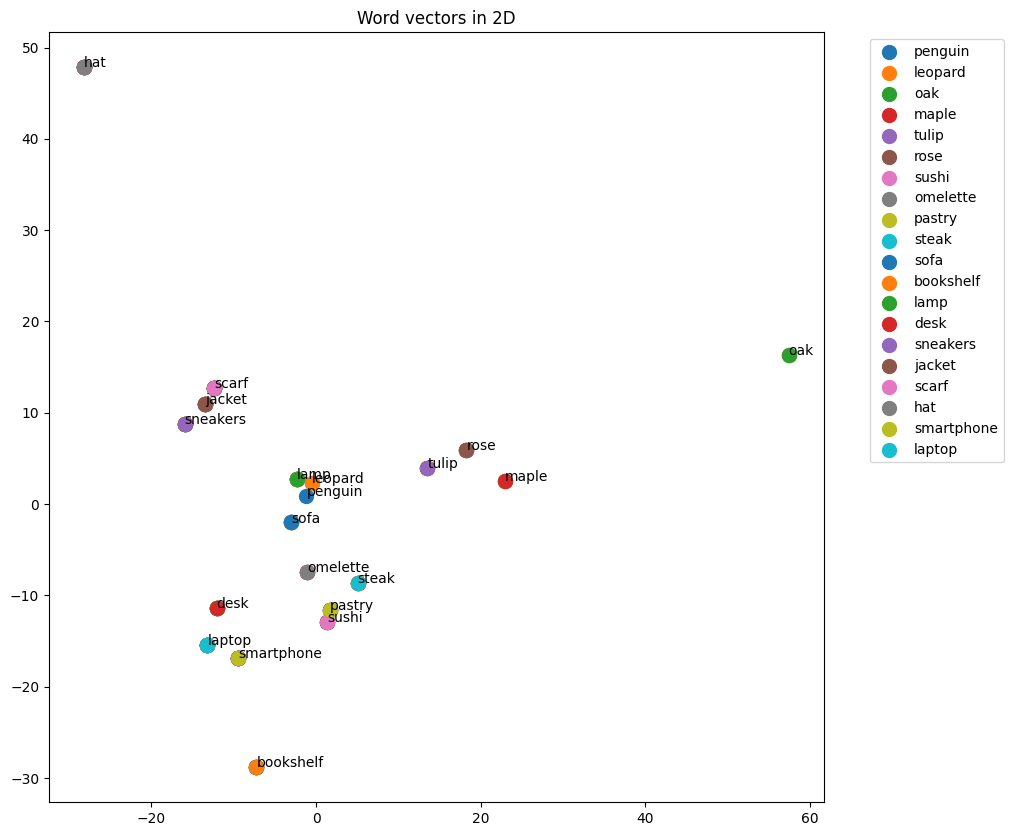

In [21]:
# Defining a new set of words
words = ["penguin", "leopard", "oak", "maple", "tulip", "rose",
         "sushi", "omelette", "pastry", "steak",
         "sofa", "bookshelf", "lamp", "desk",
         "sneakers", "jacket", "scarf", "hat",
         "smartphone", "laptop"]

# Computing the vector of each word
words_vector = [word2vec(word).vector for word in words]

# Applying PCA to reduce the dimensionality of the word vectors to 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(words_vector)

# Plotting the 2D word vectors
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(principalComponents[i:, 0], principalComponents[i:, 1], s=100)
    plt.text(principalComponents[i, 0], principalComponents[i, 1], word)
    plt.legend(words, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('Word vectors in 2D')
plt.show()


In [23]:
# Applying PCA to reduce the dimensionality of the word vectors to 3
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(words_vector)

# Creating a dataframe with the 3D word vectors to plot them
df = pd.DataFrame(principalComponents, columns=['x', 'y', 'z'])
df['word'] = words

# Plotting the 3D word vectors
fig = px.scatter_3d(df, x='x', y='y', z='z', text='word')
fig.update_traces(textposition='top center')
fig.update_layout(title='Word vectors in 3D')
fig.show()

# Exercise IV – Categorizing text with semantic similarity

In [19]:
sentences = ["I purchased a science fiction book last week",
                "I loved this fragrance: light, floral and feminine",
                "I purchased a bottle of wine"] 
keyword = "perfume"

# Computing the vector of each sentence
sentences_vector = [word2vec(sentence) for sentence in sentences]

# Computing the similarity between the keyword and each sentence
similarity = [(round(word2vec(keyword).similarity(sentence), 2), sentence) for sentence in sentences_vector]
similarity.sort(reverse=True)
similarity

[(0.51, I loved this fragrance: light, floral and feminine),
 (0.43, I purchased a bottle of wine),
 (0.28, I purchased a science fiction book last week)]

# Load the Alexa’s review dataset, and filter out the reviews which are not associated with the “music” property


In [20]:
# Loading the dataset
amazon = pd.read_csv('amazon_alexa.tsv', sep='\t')
amazon.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [56]:
# Creating a list with the reviews
list_reviews = amazon['verified_reviews'].tolist()
print(list_reviews[:5])

['Love my Echo!', 'Loved it!', 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.', 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.', 'Music']


In [63]:
# Computing the vector of each review and the similarity between the word 'music' and each review
music = word2vec('music')
music_reviews = [word2vec(str(review)) for review in list_reviews]
similarity = [music.similarity(review) for review in music_reviews]

C:\Users\Joan\AppData\Local\Temp\ipykernel_4592\2733762873.py:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity = [music.similarity(review) for review in music_reviews]


In [64]:
# Filtering out the reviews with a similarity lower or equal than 0.5
filtered_reviews = [review for review, similarity in zip(list_reviews, similarity) if float(similarity) > 0.5]
print(filtered_reviews[:5])

['Music', 'The sound is amazing and many collections of all music', 'Clear music', 'Listen music and set timer', 'Love the feature to play music in every room with multiple Echos.']


#### Adding a preprocess step to the reviews

In [21]:
# Defining the stopwords
stopwords_s = stopwords.words()
def preprocess(string):
    # Lowercasing all the words and removing the stopwords
    return " ".join(word.lower() 
     for word in str(string).split() if word not in stopwords_s)

In [22]:
# Clean the reviews
amazon['verfied_reviews_curated'] = amazon['verified_reviews'].apply(preprocess)

# Obtaining the list of curated reviews
reviews_list = amazon['verfied_reviews_curated'].to_list()
review_originals = amazon['verified_reviews']

# Obtaining the embeddings for the processed reviews
review_embeddings = [(word2vec(str(review)), review_original) for review, review_original in zip(reviews_list, review_originals)]
# Obtaining the embedding for the word 'music'
word_embeddings = word2vec("music")

In [23]:
# Computing the similarity between the word 'music' and each processed review
similarities = [(round(word_embeddings.similarity(embedding), 2), review) 
                for embedding, review in review_embeddings]

C:\Users\34644\AppData\Local\Temp\ipykernel_10752\2300918319.py:1: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarities = [(round(word_embeddings.similarity(embedding), 2), review)


In [24]:
# Use filter to get the reviews with a similarity higher than the threshold
threshold = 0.5
similar_reviews = list(filter(lambda x: x[0] > threshold, similarities))
similar_reviews.sort(reverse = True)

In [26]:
similar_reviews[:10]

[(1.0, 'Music'),
 (0.8, 'Sound is terrible if u want good music too get a bose'),
 (0.8, 'Sound is terrible if u want good music too get a bose'),
 (0.8, 'Clear music'),
 (0.8, 'Clear music'),
 (0.78, 'Love the music the stories'),
 (0.77, 'Music mainly but still checking other features'),
 (0.74, 'The sound is amazing and many collections of all music'),
 (0.74, 'The sound is amazing and many collections of all music'),
 (0.67, 'Great product we listen to music all the time')]